In [3]:
# import libraries for data manipulation
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import math
import lmfit

# Reading csv sample data set into a DataFrame df
label='out_2011.txt'
df = pd.read_csv(label, delimiter=' ', names=["index", "mass", "Nevents"])
# mass is in GeV

# Display how many rows (records) and columns (values per record) we have
print ('Data contains %i rows and %i columns' % (df.shape[0], df.shape[1]))
df.shape

# Display information about our data
df.info()

Data contains 80 rows and 3 columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   index    80 non-null     int64  
 1   mass     80 non-null     float64
 2   Nevents  80 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 2.0 KB


In [5]:
# Display the first 5 records from our dataset
df.head()

,index,mass,Nevents
0,1,100.5,635.0
1,2,101.5,581.0
2,3,102.5,496.0
3,4,103.5,459.0
4,5,104.5,465.0


In [7]:
# We will focus on the data points with masses between 110 and 150 GeV
df_reduced = df.loc[(df['mass'] >= 110) & (df['mass'] <= 150)]
df_reduced.head()

,index,mass,Nevents
10,11,110.5,357.0
11,12,111.5,363.0
12,13,112.5,303.0
13,14,113.5,346.0
14,15,114.5,319.0


<>:14: SyntaxWarning: invalid escape sequence '\g'
<>:14: SyntaxWarning: invalid escape sequence '\g'
C:\Users\cgroc\AppData\Local\Temp\ipykernel_22992\4168238525.py:14: SyntaxWarning: invalid escape sequence '\g'
  plt.xlabel("$m_{\gamma\gamma}$")


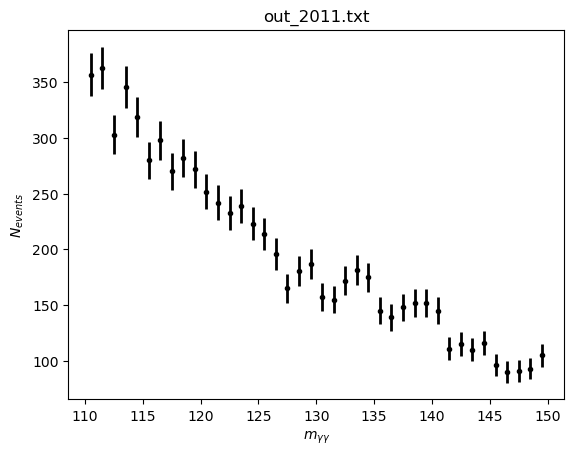

In [9]:
#Let's assign the data to numpy arrays
x = df_reduced["mass"].to_numpy()
y = df_reduced["Nevents"].to_numpy()

# uncertainties in y will be treated as Poisson uncertainties       
y_err = np.sqrt(y)

# create an array with weights to be used in lmfit  
weights = 1.0/y_err

#Now we plot it. 
plt.title(label)
plt.errorbar(x,y,y_err, lw=2,fmt=".k", capsize=0)
plt.xlabel("$m_{\gamma\gamma}$")
plt.ylabel("$N_{events}$")
plt.show()

The mass is in the figure is in GeV. The mass of the Higgs Boson was measured in two decay channels of proton-proton collision data from the Large Hadron Collider; its value is around 125 GeV (124.98 $\pm$ 0.28) GeV measured by the ATLAS and CMS experiments. For more information, check https://home.cern/science/physics/higgs-boson.

However, the data above is from a channel that mostly contains "background" because it is important to try to describe the background first before analysing the channels in which Higgs Boson events are more likely to occur. We want to come up with the right fit function for this data. There is a systematic procedure in which we can fit a library of functions on the data points. We will create a library of polynomials and evaluate the quality of fit of each one of them.


<>:54: SyntaxWarning: invalid escape sequence '\g'
<>:54: SyntaxWarning: invalid escape sequence '\g'
C:\Users\cgroc\AppData\Local\Temp\ipykernel_22992\2002810173.py:54: SyntaxWarning: invalid escape sequence '\g'
  plt.xlabel("$m_{\gamma\gamma}$")


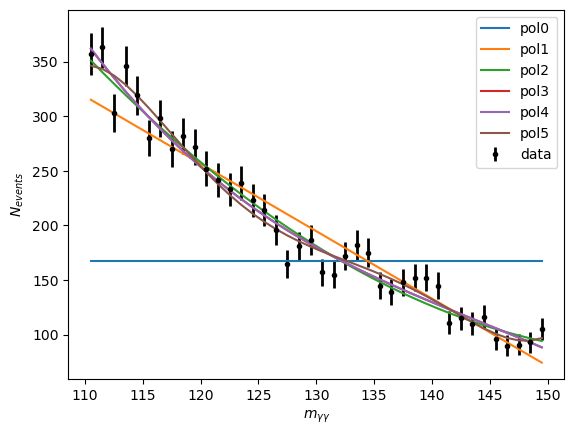

In [12]:
# Library of models
def pol0(x,p0):
    pols=[p0]
    y = np.polyval(pols,x)
    return y

def pol1(x,p0,p1):
    pols=[p0,p1]
    y = np.polyval(pols,x)
    return y

def pol2(x, p0, p1,p2):
    pols=[p0,p1,p2]
    y = np.polyval(pols,x)
    return y

def pol3(x, p0, p1,p2,p3):
    pols=[p0,p1,p2,p3]
    y = np.polyval(pols,x)
    return y

def pol4(x, p0, p1,p2,p3,p4):
    pols=[p0,p1,p2,p3,p4]
    y = np.polyval(pols,x)
    return y

def pol5(x, p0, p1,p2,p3,p4,p5):
    pols=[p0,p1,p2,p3,p4,p5]
    y = np.polyval(pols,x)
    return y

def fitModel(iX,iY,iWeights,iFunc):
    model  = lmfit.Model(iFunc)
    p = model.make_params(p0=0,p1=0,p2=0,p3=0,p4=0,p5=0)
    result = model.fit(data=iY,params=p,x=iX,weights=iWeights)
    #result = lmfit.minimize(binnedLikelihood, params, args=(iX,iY,(iY**0.5),iFunc))
    output = model.eval(params=result.params,x=iX)
    return output

result0 = fitModel(x,y,weights,pol0)
result1 = fitModel(x,y,weights,pol1)
result2 = fitModel(x,y,weights,pol2)
result3 = fitModel(x,y,weights,pol3)
result4 = fitModel(x,y,weights,pol4)
result5 = fitModel(x,y,weights,pol5)

plt.errorbar(x,y,y_err, lw=2,fmt=".k", capsize=0,label="data")
plt.plot(x,result0,label="pol0")
plt.plot(x,result1,label="pol1")
plt.plot(x,result2,label="pol2")
plt.plot(x,result3,label="pol3")
plt.plot(x,result4,label="pol4")
plt.plot(x,result5,label="pol5")
plt.xlabel("$m_{\gamma\gamma}$")
plt.ylabel("$N_{events}$")
plt.legend()
plt.show()

#res0.plot()
#result1.plot()
#result2.plot()
#result3.plot()
#result4.plot()
#result5.plot()

## But what is the most meaningful polynomial for this fit? Which order of polynomial should we stop?

To try to decide this, we will use f-Statistic and conduct a f-test.

The statistician Ronald Fisher developed the f-test which is a generalization of the t-test. The method was brought into solving physics problems by Gregory Chow at MIT in the late 1950s with the creation of the Chow-test which can be applied in the context of how well a fit behaves.

<b>F-test</b>

https://en.wikipedia.org/wiki/F-test

The F-test is used to compare a number of distributions with each other. The test is based on considering a decomposition of the variability in a collection of data in terms of sums of squares. The test relies on the definition of a `ratio` of two scaled sums of squares reflecting different sources of variability. These sums are built so that the statistic tends to be greater when the null hypothesis is not true. In order for the statistic to follow the F-distribution under the null hypothesis, the sums of squares should be statistically independent, and each should follow a scaled $\chi^2$-distribution. The latter condition is guaranteed if the data values are independent and normally distributed with a common variance.

<b>One-way Analysis of Variance (ANOVA)</b>

The F-test in one-way analysis of variance (ANOVA) is used to assess whether the expected values of a quantitative variable within several pre-defined groups differ from each other. For example, suppose that a medical trial compares four treatments. The ANOVA F-test can be used to assess whether any of the treatments are on average superior, or inferior, to the others versus the null hypothesis that all four treatments yield the same mean response. 

Consider we have a number of groups of data ($K$), each containing a certain number of points ($n$). The ANOVA F-test statistic is defined as 

\begin{eqnarray}
F &=& \frac{\mbox{explained variance}}{\mbox{unexplained variance}} \\
&\mbox{or} \\
F &=& \frac{\mbox{between-group variability}}{\mbox{within-group variability}}
\end{eqnarray}

The numerator of the ratio is given by

\begin{equation}
\sum_{i=1}^{K}n_i \frac{(\bar{y}_i - \bar{y})^2}{(K-1)}
\end{equation}

where $\bar{y}_i$ denotes the sample mean in the $i$-th group, $n_i$ is the number of observations in the $i$-th group, $\bar{y}$ denotes the overall mean of the data, and $K$ denotes the number of groups.

The denominator of the ration is given by

\begin{equation}
\sum_{i=1}^{K} \sum_{j=1}^{n_i} \frac{(y_{ij} - \bar{y}_i)^2}{(N-K)}
\end{equation}

where $y_{ij}$ is the $j$-th observation in the $i$-th group and $N$ is the overall sample size. This F-statistic follows the F-distribution with degrees of freedom $d_{1}=K-1$ and $d_{2}=N-K$ under the null hypothesis. The statistic will be large if the between-group variability is large relative to the within-group variability, which is unlikely to happen if the population means of the groups all have the same value.

In other words, the F-statistic can be interpreted as

\begin{equation}
F = \frac{U_1/d_1}{U_2/d_2}
\end{equation}

where $U_1$ and $U_2$ are independent random variables with chi-square distributions with respective degrees of freedom $d_1$ and $d_2$. From the above formulas, it has been derived that the F-statistic follows the F-distribution given by

\begin{equation}
f(x;d_1,d_2) = \frac{1}{B\left (\frac{d_1}{2}, \frac{d_2}{2}\right )} \left( \frac{d_1}{d_2} \right )^{d_1/2} x^{-1+d_1/2} \left( 1 + \frac{d_1}{d_2} x\right)^{-(d_1+d_2)/2}
\end{equation}

with $x>0$ being a random variable and $B$ is the beta function.

The result of the F-test can be determined by comparing calculated $F$ value and critical $F$ value with specific significance level (e.g., 5%). The $F$ table serves as a reference guide containing critical $F$ values for the distribution of the F-statistic under the assumption of a true null hypothesis. To locate the critical $F$ value in the $F$ table, one needs to utilize the respective degrees of freedom. This involves identifying the appropriate row and column in the $F$ table that corresponds to the significance level being tested (e.g., 5%).

<b>Decision Process</b>

If the $F$ statistic < the critical $F$ value (or p-value > $\alpha$):

- Fail to reject null hypothesis
- Reject alternative hypothesis
- There is no significant differences among sample averages
- The observed differences among sample averages could be reasonably caused by random chance itself
- The result is not statistically significant

If the $F$ statistic > the critical $F$ value (or p-value < $\alpha$):

- Accept alternative hypothesis
- Reject null hypothesis
- There is significant differences among sample averages
- The observed differences among sample averages could not be reasonably caused by random chance itself
- The result is statistically significant

Note that when there are only two groups for the one-way ANOVA F-test, $F=t^{2}$ where $t$ is the Student's $t$ statistic.


<b>F-test in Regression and Polynomial Fit Problems</b>

Consider two models, 1 and 2, where model 1 is "nested" within model 2. Model 1 is the restricted model, and model 2 is the unrestricted one. For instance, model 1 has $p_1$ parameters and model 2 has $p_2$ parameters with $p_1 < p_2$. The same regression curve can be achieved by some choice of the parameters of model 2.

The model with more parameters will always be able to fit the data at least as well as the model with fewer parameters. Thus typically model 2 will give a better (i.e. lower error) fit to the data than model 1. But one often wants to determine whether model 2 gives a significantly better fit to the data. One approach to this problem is to use an F-test.

If there are $n$ data points to estimate parameters of both models from, then one can calculate the F statistic, given by

\begin{equation}
F = \frac{RSS_1 - RSS_2}{RSS_2} \frac{n-p_2}{p_2 - p_1}
\end{equation}

where $RSS_i$ is the residual sum of squares of model $i$. If the regression model has been calculated with weights, then replace $RSS_i$ with $\chi^2$, the weighted sum of squared residuals. Under the null hypothesis that model 2 does not provide a significantly better fit than model 1, $F$ will have an $F$ distribution, with $(p_2−p_1, n−p_2)$ degrees of freedom. The null hypothesis is rejected if the $F$ calculated from the data is greater than the critical value of the F-distribution for some desired false-rejection probability (e.g., 0.05). Since $F$ is a monotone function of the likelihood ratio statistic, the F-test is a likelihood ratio test. This can also be re-written as

\begin{equation}
F = \frac{\sigma_{\mbox{group}}^2}{\sigma^2}
\end{equation}

\begin{equation}
\sigma_{\mbox{group}}^2 = \frac{-\sum_{i=1}^n (y_i - f_2(x_i))^2 +\sum_{i=1}^n (y_i - f_1(x_i))^2}{\Delta_{\mbox{dof}}^{2\rightarrow 1}}
\end{equation}

\begin{equation}
\sigma^2 = \frac{1}{n-n_{f_{2\,dof}}} \sum_{i=1}^n (y_i - f_2(x_i))^2
\end{equation}

More generally, the f-distribution helps determining if a new fit is significantly better than the previous one. As we go to higher order polynomials, we tend to get smaller and smaller standard deviations (or residuals). <b>The main issue is when do we stop increasing the order of the polynomial</b>. According to the F-statistic ratio, the variation from the higher order polynomial to a lower should be smaller than the average variation of the residuals, meaning that if the fitting of two polynomials does not change significantly from one another, the F-values will be smaller and smaller (with high probability values). This would be the "null hypothesis" in which both models perform equally.

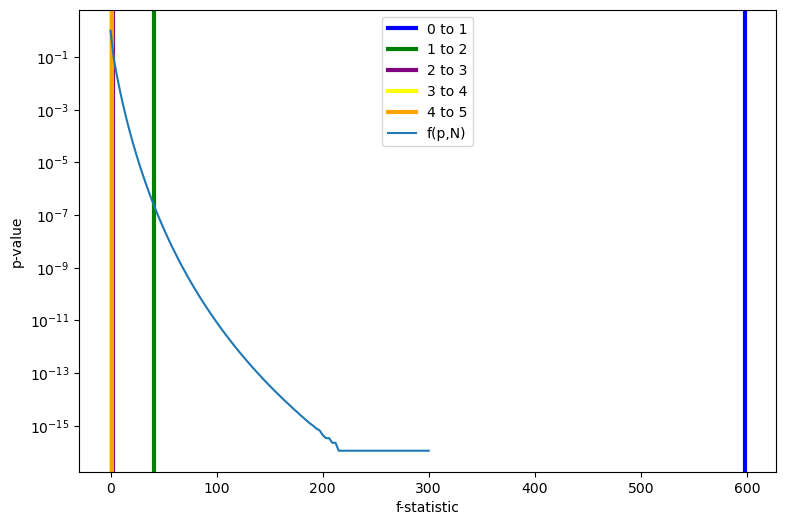

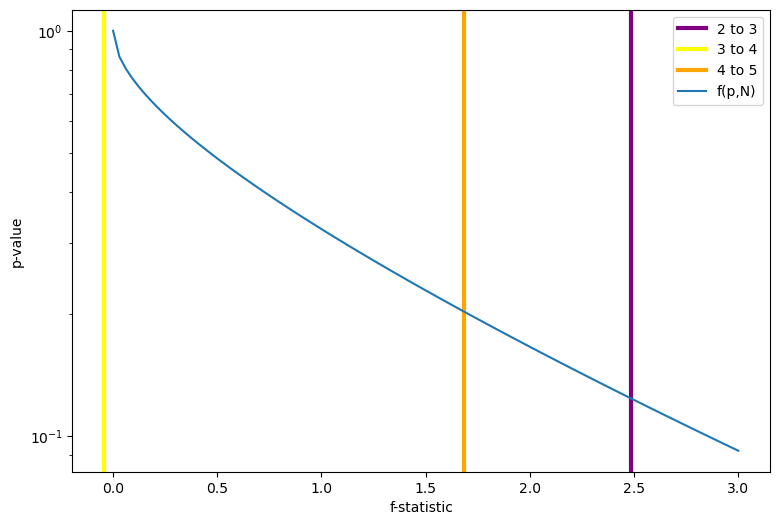

f critical: 2.8546550900896466 alpha: 0.1


f-stat 0 to 1: 597.8633121060539
p-value 1 better than 0 by chance: 1.1102230246251565e-16

f-stat 1 to 2: 40.71262239293345
p-value 2 better than 1 by chance: 1.9200336942581941e-07

f-stat 2 to 3: 2.487633909576869
p-value 3 better than 2 by chance: 0.12349215252990908

f-stat 3 to 4: -0.04270994467290752
p-value 4 better than 3 by chance: 1.0

f-stat 4 to 5: 1.683414550470734
p-value 5 better than 4 by chance: 0.2032060241615652


In [14]:
def residual2(iY,iFunc,iYErr):
    residval = (iY-iFunc)  # in principle we would divide this by iYErr but this will be cancelled later.
    return np.sum(residval**2)

def ftest(iY,iYerr,f1,f2,ndof1,ndof2):
    r1=residual2(iY,f1,iYerr)
    r2=residual2(iY,f2,iYerr)
    sigma2group=(r1-r2)/(ndof2-ndof1)
    sigma2=r2/(len(iY)-ndof2)
    return sigma2group/sigma2

# Commpute the f-tests for each pair of models
f10=ftest(y,y_err,result0,result1,1,2)
f21=ftest(y,y_err,result1,result2,2,3)
f32=ftest(y,y_err,result2,result3,3,4)
f43=ftest(y,y_err,result3,result4,4,5)
f54=ftest(y,y_err,result4,result5,5,6)

xrange=np.linspace(0,300,100)
# For the sake of simplicity, we will visualize the F scores over a F distribution of N-5 degrees of freedom
# The distribution does not change significantly for N-4, N-3, ...
farr=1-stats.f.cdf(xrange,1,len(y)-5) #number of bins (N) - 5 floating parameters
fig, ax = plt.subplots(figsize=(9,6))

ax.axvline(x=f10,linewidth=3,c='b',label='0 to 1')
ax.axvline(x=f21,linewidth=3,c='g',label='1 to 2')
ax.axvline(x=f32,linewidth=3,c='purple',label='2 to 3')
ax.axvline(x=f43,linewidth=3,c='yellow',label='3 to 4')
ax.axvline(x=f54,linewidth=3,c='orange',label='4 to 5')

ax.set_yscale('log')
plt.plot(xrange,farr,label='f(p,N)')
plt.legend()
plt.xlabel('f-statistic')
plt.ylabel('p-value')
plt.show()

xrange=np.linspace(0,3,100)
farr=1-stats.f.cdf(xrange,1,len(y)-5) 
fig, ax = plt.subplots(figsize=(9,6))
ax.axvline(x=f32,linewidth=3,c='purple',label='2 to 3')
ax.axvline(x=f43,linewidth=3,c='yellow',label='3 to 4')
ax.axvline(x=f54,linewidth=3,c='orange',label='4 to 5')
ax.set_yscale('log')
plt.xlabel('f-statistic')
plt.plot(xrange,farr,label='f(p,N)')
plt.ylabel('p-value')
plt.legend()
plt.show()

# Determine the F critical value
alpha = 0.1
fc = stats.f.ppf(1-alpha, 1, len(y)-5)
print("f critical:", fc, "alpha:", alpha)
print("\n")

#PERFORM F-TEST BELOW
#print f-stat and p-value
f10=ftest(y,y_err,result0,result1,1,2)
p_val10 = 1 - stats.f.cdf(f10, dfn=1, dfd=len(y)-2)
print('f-stat 0 to 1:', f10)
print('p-value 1 better than 0 by chance:', p_val10)
print()
f21=ftest(y,y_err,result1,result2,2,3)
p_val21 = 1 - stats.f.cdf(f21, dfn=1, dfd=len(y)-3)
print('f-stat 1 to 2:', f21)
print('p-value 2 better than 1 by chance:', p_val21)
print()
f32=ftest(y,y_err,result2,result3,3,4)
p_val32 = 1 - stats.f.cdf(f32, dfn=1, dfd=len(y)-4)
print('f-stat 2 to 3:', f32)
print('p-value 3 better than 2 by chance:', p_val32)
print()
f43=ftest(y,y_err,result3,result4,4,5)
p_val43 = 1 - stats.f.cdf(f43, dfn=1, dfd=len(y)-5)
print('f-stat 3 to 4:', f43)
print('p-value 4 better than 3 by chance:', p_val43)
print()
f54=ftest(y,y_err,result4,result5,5,6)
p_val54 = 1 - stats.f.cdf(f54, dfn=1, dfd=len(y)-6)
print('f-stat 4 to 5:', f54)
print('p-value 5 better than 4 by chance:', p_val54)


<>:14: SyntaxWarning: invalid escape sequence '\g'
<>:14: SyntaxWarning: invalid escape sequence '\g'
C:\Users\cgroc\AppData\Local\Temp\ipykernel_22992\3581311149.py:14: SyntaxWarning: invalid escape sequence '\g'
  plt.xlabel("$m_{\gamma\gamma}$")


Mean of residuals: 0.040777071083410624 	STD: 1.0387012275212217
chi2 prob: 0.22275029606008334
Normalized chi2: 1.1681762265732267


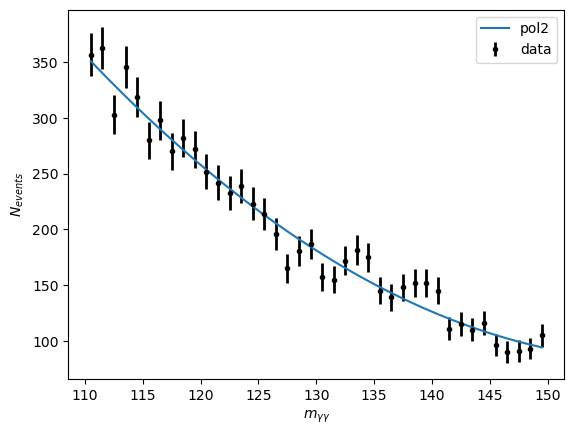

In [16]:
def chi2(iY,iFunc,iYErr,iNDOF):
    resid = (iY-iFunc)/iYErr
    chi2value = np.sum(resid**2)
    print("Mean of residuals:",resid.mean(),"\tSTD:",resid.std())
    chi2prob=1-stats.chi2.cdf(chi2value,len(iY)-iNDOF)
    print("chi2 prob:",chi2prob)
    return chi2value/(len(iY)-iNDOF)

chi2value=chi2(y,result2,y_err,3) #chisquare of a 2nd order polynomial (3 floating parameters)
print("Normalized chi2:",chi2value)

plt.errorbar(x,y,y_err, lw=2,fmt=".k", capsize=0,label="data")
plt.plot(x,result2,label="pol2")
plt.xlabel("$m_{\gamma\gamma}$")
plt.ylabel("$N_{events}$")
plt.legend()
plt.show()


We see that the F-statistic found when increasing the polynomial order from 2 to 3 already has a relatively large probability, which means that there is a high probability that any improvements in the fit found by adding a 3rd order term are due to random chance. By checking the $\chi^2$ value as well, we determine that the 2nd order polynomial gives a resonably good fit.